In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [6]:
!pip install gym

## 1. Environment

In [7]:
import gym
from gym.envs.registration import register

#convert slippery to non-slippery (deterministic)
try:
    register(
    id = 'FrozenLakeNotSlippery-v0',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps = 100,
    reward_threshold = 0.78,
  )
except:
    print('Already registered!')

D:\Anaconda\lib\site-packages\gym\envs\registration.py:498: UserWarning: WARN: Overriding environment FrozenLakeNotSlippery-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [4]:
from IPython.display import clear_output

In [5]:
# env = gym.make('FrozenLakeNotSlippery-v0', render_mode='human')
# env.reset()

# for step in range(15):
#     env.render()
#     action = env.action_space.sample()
#     observation, reward, done,truncated, info = env.step(action)
#     time.sleep(0.5)
# #     clear_output(wait = True)
#     if done:
#         env.reset()

# time.sleep(0.5)
# env.close()

In [45]:
action_size = env.action_space.n
state_size = env.observation_space.n
# rows -- states, columns -- actions
q_table = np.zeros([state_size, action_size]) #4 actions on a 4x4 grid lead to 16 states
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

## 2. Hyperparameters

In [8]:
EPOCHS = 20000 #how many times agent plays the game
ALPHA = 0.8 #learning rate
GAMMA = 0.95 #discount rate

In [9]:
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.001

## 3. Update Functions

In [10]:
def epsilon_greedy_action_selection(epsilon, q_table, discrete_state):
    
    random_number = np.random.random() #returns a no. between 0 and 1, thus
                                    #will always start by exploring, since epsilon initially = 1
    
    #EXPLOITATION (choose the action that maximizes Q)
    if random_number > epsilon:
        
        state_row = q_table[discrete_state, :]
        action = np.argmax(state_row)
    
    #EXPLORATION (choose a random action)
    else:
        action = env.action_space.sample()
    
    return action    

In [21]:
def compute_next_q_value(old_q_value, reward, next_optimal_q_value):
    
    return old_q_value + ALPHA*(GAMMA*next_optimal_q_value + reward - old_q_value)

In [12]:
def reduce_epsilon(epsilon, epoch):
    
    return min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*epoch)

## 4. Agent Training

271.0
998.0
1902.0
2866.0
3845.0
4831.0
5823.0
6820.0
7812.0
8804.0
9791.0
10777.0
11764.0
12749.0
13735.0
14728.0
15722.0
16713.0
17698.0
18693.0


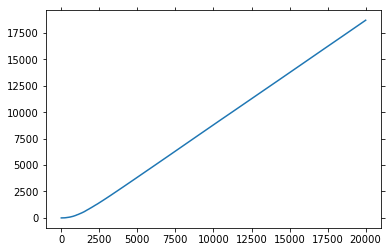

In [47]:
rewards = []
log_interval = 1000


fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.canvas.draw()
epoch_plot_tracker = []
total_reward_plot_tracker = []


env = gym.make('FrozenLakeNotSlippery-v0')
env.reset()

for episode in range(EPOCHS):

    state = env.reset()[0]
    done = False
    total_rewards = 0
    
    #Agent plays the game
    while not done:
        
        #PERFORM ACTION
        action = epsilon_greedy_action_selection(epsilon, q_table, state)
        
#         print(state)

        #state, reward...env.step() - GET RESULTS OF ACTION
        new_state, reward, done, truncated, info = env.step(action)
        
        #GET OLD Q VALUE
        old_q_value = q_table[state, action]
        
        #GET NEXT OPTIMAL Q VALUE
        next_optimal_q_value = np.max(q_table[new_state, :])
        
        #COMPUTE NEXT Q VALUE (EXPLORE/EXPLOIT)
        next_q_value = compute_next_q_value(old_q_value, reward, next_optimal_q_value)
       
        #UPDATE Q TABLE
        q_table[state, action] = next_q_value
        
        #TRACK REWARDS
        total_rewards += reward 
        
#         print(new_state)

        state = new_state
        
    #Agent finishes the game
    episode += 1
    
    epsilon = reduce_epsilon(epsilon, episode)
    
    rewards.append(total_rewards)
    
    
    total_reward_plot_tracker.append(np.sum(rewards))
    epoch_plot_tracker.append(episode)
    
    #Print rewards every 1000 episodes
    if episode%log_interval == 0:
        ax.clear()
        ax.plot(epoch_plot_tracker, total_reward_plot_tracker)
        fig.canvas.draw()
        print(np.sum(rewards))
    
env.close()    

## Trained Agent

In [44]:
q_table

array([[0.73509189, 0.77378094, 0.77378094, 0.73509189],
       [0.73509189, 0.        , 0.81450625, 0.77378094],
       [0.77378094, 0.857375  , 0.77378094, 0.81450625],
       [0.81450625, 0.        , 0.7734419 , 0.7737809 ],
       [0.77378094, 0.81450625, 0.        , 0.73509189],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.        , 0.81450625],
       [0.        , 0.        , 0.        , 0.        ],
       [0.81450625, 0.        , 0.857375  , 0.77378094],
       [0.81450625, 0.9025    , 0.9025    , 0.        ],
       [0.857375  , 0.95      , 0.        , 0.857375  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.95      , 0.857375  ],
       [0.9025    , 0.95      , 1.        , 0.9025    ],
       [0.        , 0.        , 0.        , 0.        ]])

In [48]:
env = gym.make('FrozenLakeNotSlippery-v0', render_mode='human')
state = env.reset()[0]

for steps in range(100):
    env.render()
    action = np.argmax(q_table[state, :])
    state, reward, done, trunc, info = env.step(action)
    time.sleep(1)
    if done:
        break
        
time.sleep(1)
env.close()